## IMPORTING NECESSARY LIBRARIES

In [1]:
# Importing libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for machine learning models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Display settings
import warnings
warnings.filterwarnings('ignore')


## Loading the Dataset

In [2]:
# Loading the dataset
df = pd.read_csv('/kaggle/input/mobile-phone/dataset.csv')

# Display the first 5 rows of the dataset
df.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Data Exploration

In [3]:
# Checking the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Checking for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Getting a summary of the dataset
df.info()

Dataset contains 2000 rows and 21 columns.
Missing values in each column:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep 

## Data Visualization

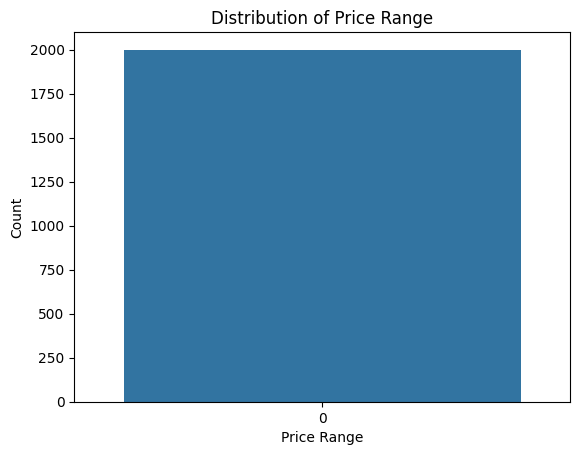

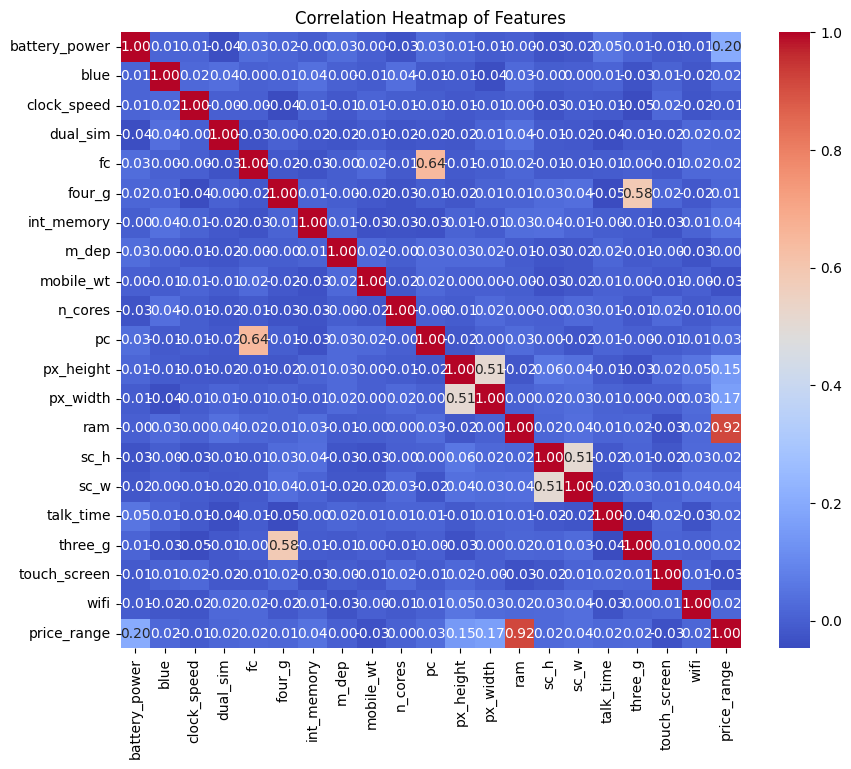

In [4]:
# Visualizing the distribution of the target variable
sns.countplot(df['price_range'])
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

# Visualizing correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

## Splitting Data into Training and Test Sets

In [5]:
# Defining features and target
X = df.drop('price_range', axis=1)
y = df['price_range']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")


Training set size: 1400 rows
Test set size: 600 rows


## Feature Scaling

In [6]:
# Scaling the features using StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Only transform the test data
X_test_scaled = scaler.transform(X_test)

# Displaying the scaled training data
pd.DataFrame(X_train_scaled, columns=X.columns).head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.763895,1.012941,-1.122314,0.953918,-0.987179,-1.057357,1.685389,0.671434,-0.527903,0.188920,0.681147,-0.626254,0.264160,1.414973,1.377152,0.538114,0.738174,-1.800673,0.991465,1.001430
1,-0.097852,1.012941,-1.243552,0.953918,1.095268,-1.057357,-0.670704,-1.412840,-0.329679,0.188920,0.016613,-0.967325,1.077664,0.704443,1.613980,0.308920,0.555973,0.555348,0.991465,1.001430
2,0.629151,-0.987224,0.696250,-1.048308,-0.987179,-1.057357,-0.013189,0.671434,1.680880,-1.554001,0.016613,-1.071920,-0.017080,0.729390,-0.280641,0.996501,0.738174,0.555348,0.991465,-0.998572
3,1.649665,1.012941,-1.243552,0.953918,-0.987179,-1.057357,0.425153,-0.718082,1.284432,1.060381,1.511815,-0.351123,-0.753882,-1.433613,-0.991123,0.308920,1.102575,0.555348,0.991465,-0.998572
4,-0.809051,-0.987224,-1.001076,0.953918,1.095268,0.945755,-0.232361,-1.065461,0.293311,0.624650,1.013414,-0.890016,-0.842206,-1.267300,1.613980,1.225694,-0.537232,0.555348,-1.008608,1.001430


## Model Selection - Random Forest Classifier

In [7]:
# Initializing the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Training the model
rf_model.fit(X_train_scaled, y_train)

# Predicting on the test data
y_pred = rf_model.predict(X_test_scaled)

# Evaluating the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest model: {accuracy * 100:.2f}%")


Accuracy of Random Forest model: 86.83%


## Model Evaluation - Confusion Matrix & Classification Report

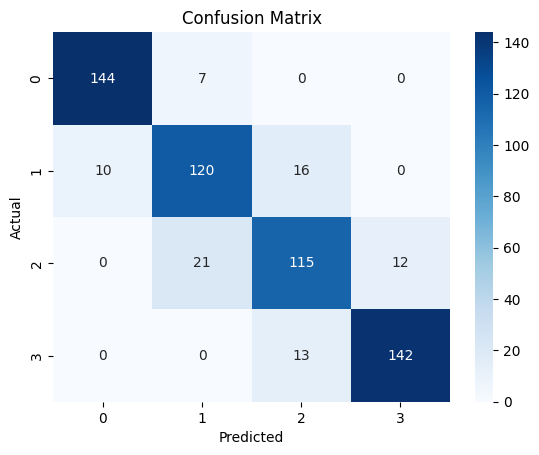

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       151
           1       0.81      0.82      0.82       146
           2       0.80      0.78      0.79       148
           3       0.92      0.92      0.92       155

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600



In [8]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


## Feature Importance

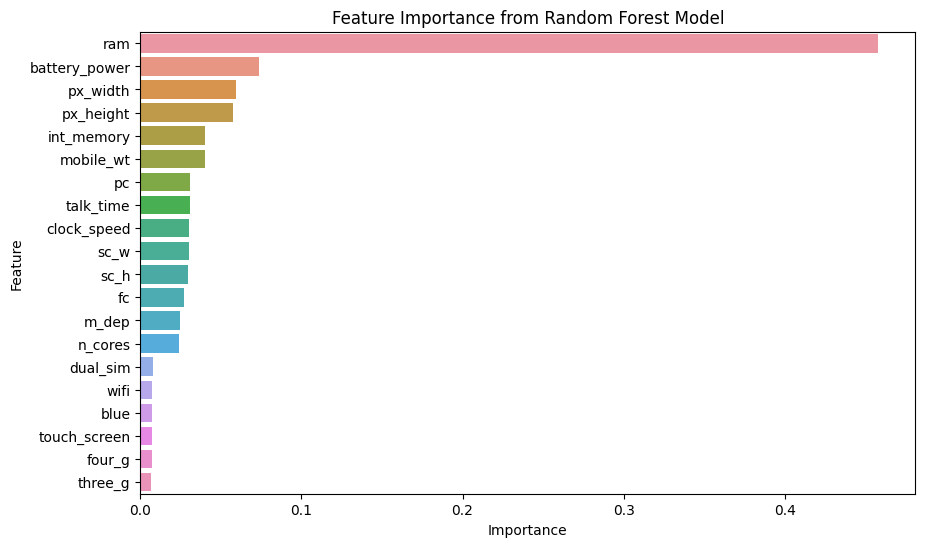

In [9]:
# Extracting feature importance from the model
feature_importances = rf_model.feature_importances_

# Creating a DataFrame for feature importances
feat_imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sorting the features by importance
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importance from Random Forest Model')
plt.show()


## Hyperparameter Tuning with GridSearchCV

In [10]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing the GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fitting the model
grid_search.fit(X_train_scaled, y_train)

# Getting the best parameters
print(f"Best parameters found: {grid_search.best_params_}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.6s
[CV] END max_depth=10, min_sa

In [11]:
# Training Random Forest with the best parameters
best_rf_model = grid_search.best_estimator_

# Predicting on the test data
y_pred_best = best_rf_model.predict(X_test_scaled)

# Evaluating the tuned model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy of Random Forest after tuning: {accuracy_best * 100:.2f}%")

Accuracy of Random Forest after tuning: 87.50%


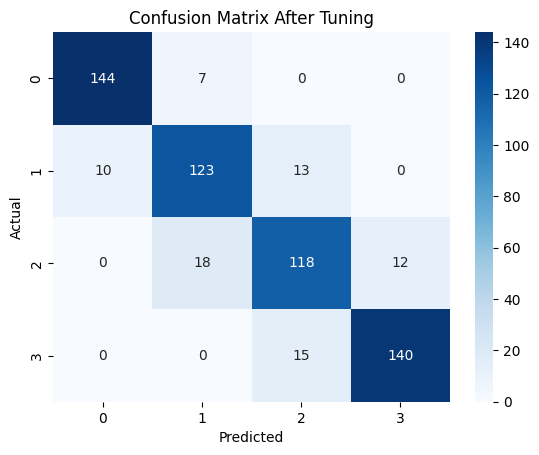

Classification Report After Tuning:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       151
           1       0.83      0.84      0.84       146
           2       0.81      0.80      0.80       148
           3       0.92      0.90      0.91       155

    accuracy                           0.88       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.88      0.87       600



In [12]:
# Confusion Matrix after tuning
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix After Tuning')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report after tuning
print("Classification Report After Tuning:")
print(classification_report(y_test, y_pred_best))

## Trying XGBClassifier

In [13]:
from xgboost import XGBClassifier

# Initializing and training the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predicting with XGBoost
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluating XGBoost model performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy with XGBoost: {accuracy_xgb * 100:.2f}%")


Accuracy with XGBoost: 90.00%


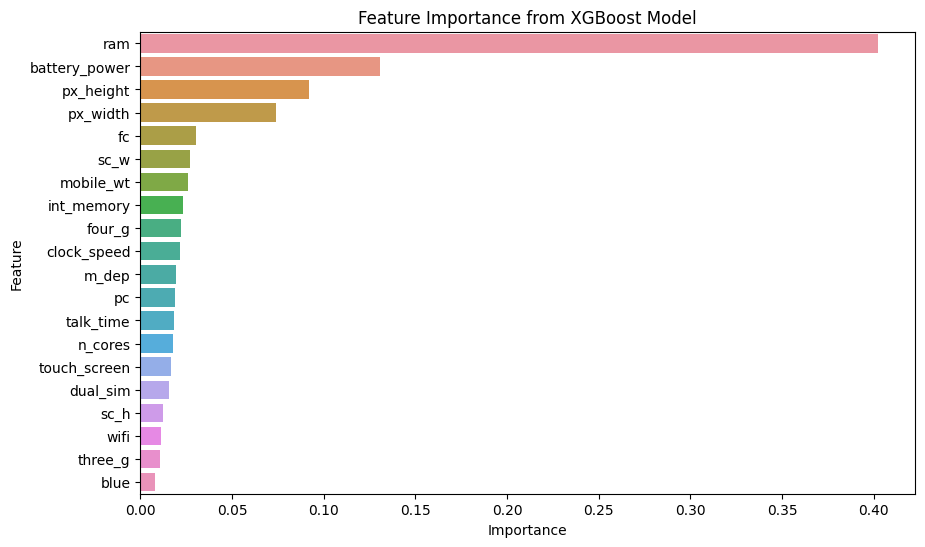

[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.6s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.6s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total

In [14]:
# Plotting feature importance for XGBoost
xgb_importances = xgb_model.feature_importances_
feat_imp_xgb_df = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_importances})

# Sorting the features by importance
feat_imp_xgb_df = feat_imp_xgb_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_xgb_df)
plt.title('Feature Importance from XGBoost Model')
plt.show()


In [15]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initializing GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(estimator=XGBClassifier(random_state=42),
                               param_grid=param_grid_xgb,
                               cv=5,  # 5-fold cross-validation
                               n_jobs=-1,
                               verbose=2)

# Fitting the model to find the best hyperparameters
grid_search_xgb.fit(X_train_scaled, y_train)

# Displaying the best parameters
print(f"Best parameters found: {grid_search_xgb.best_params_}")


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_de

In [16]:
# Retraining XGBoost with the best parameters
best_xgb_model = grid_search_xgb.best_estimator_

# Predicting on the test data
y_pred_best_xgb = best_xgb_model.predict(X_test_scaled)

# Evaluating the tuned XGBoost model
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
print(f"Accuracy of XGBoost after fine-tuning: {accuracy_best_xgb * 100:.2f}%")


Accuracy of XGBoost after fine-tuning: 90.50%


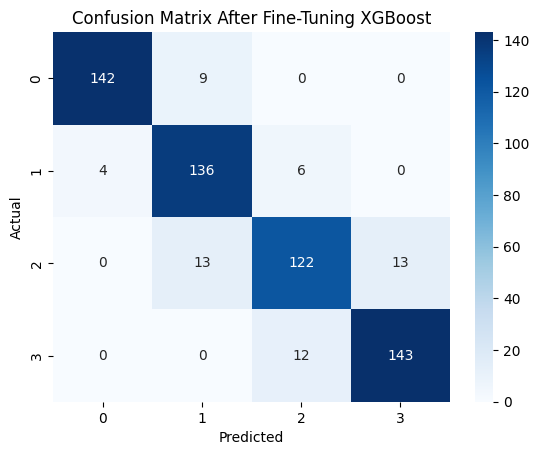

Classification Report After Fine-Tuning XGBoost:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       151
           1       0.86      0.93      0.89       146
           2       0.87      0.82      0.85       148
           3       0.92      0.92      0.92       155

    accuracy                           0.91       600
   macro avg       0.91      0.90      0.90       600
weighted avg       0.91      0.91      0.90       600



In [17]:
# Confusion Matrix after fine-tuning
conf_matrix_best_xgb = confusion_matrix(y_test, y_pred_best_xgb)
sns.heatmap(conf_matrix_best_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix After Fine-Tuning XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report after fine-tuning
print("Classification Report After Fine-Tuning XGBoost:")
print(classification_report(y_test, y_pred_best_xgb))

## Saving the classifier as a model file 

In [18]:
import joblib

# Saving the model to a file
joblib.dump(best_xgb_model, 'mobileprice_model.pkl')


['mobileprice_model.pkl']

[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.